### Embeddings Pré-Treinados com FastText

### Introdução

Neste notebook, exploramos o uso de embeddings pré-treinados usando o modelo **FastText**, desenvolvido pelo Facebook. Diferente de modelos como Word2Vec, o FastText considera também os subcomponentes das palavras (n-gramas), o que melhora sua capacidade de lidar com palavras raras ou mesmo desconhecidas (OOV — Out of Vocabulary).

Usamos o arquivo `wiki-news-300d-1M.vec`, que contém vetores de palavras treinados em notícias e na Wikipedia.  
Fonte para Baixar: https://fasttext.cc/docs/en/english-vectors.html

In [ ]:
### 📦 Carregando o Word2Vec pré-treinado (Google News)

In [3]:
from gensim.models import KeyedVectors

caminho_fasttext = 'data/wiki-news-300d-1M.vec'

print("Carregando o modelo /wiki-news-300d-1M.vec...")
modelo_ft = KeyedVectors.load_word2vec_format(caminho_fasttext, binary=False)
print("Modelo carregado com sucesso!")


Carregando o modelo FastText...
Modelo carregado com sucesso!


### 🔍 Palavras semelhantes e analogias

In [5]:
# Palavras semelhantes a 'computer'
print("Palavras semelhantes a 'computer':")
for palavra, score in modelo_ft.most_similar('computer', topn=5):
    print(f"{palavra}: {score:.4f}")

Palavras semelhantes a 'computer':
computers: 0.8356
Computer: 0.7434
software: 0.6963
laptop: 0.6789
computing: 0.6587


### Analogia vetorial

In [6]:
# Analogia: king - man + woman ≈ ?
print("\nAnalogia: king - man + woman = ?")
resultado = modelo_ft.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"Resultado: {resultado[0][0]} ({resultado[0][1]:.4f})")


Analogia: king - man + woman = ?
Resultado: queen (0.7516)


### Visualização com PCA

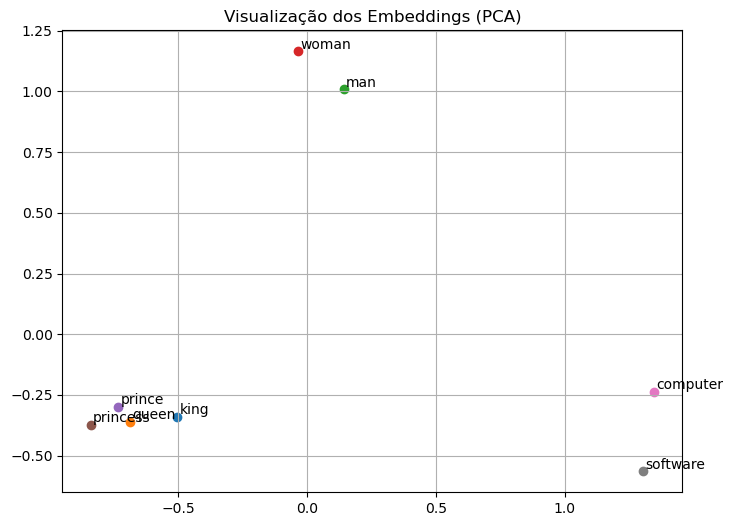

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

palavras = ['king', 'queen', 'man', 'woman', 'prince', 'princess', 'computer', 'software']
vetores = [modelo_ft[word] for word in palavras]

pca = PCA(n_components=2)
vetores_2d = pca.fit_transform(vetores)

plt.figure(figsize=(8,6))
for i, word in enumerate(palavras):
    plt.scatter(vetores_2d[i, 0], vetores_2d[i, 1])
    plt.text(vetores_2d[i, 0]+0.01, vetores_2d[i, 1]+0.01, word)
plt.title("Visualização dos Embeddings (PCA)")
plt.grid(True)
plt.show()

### Conclusão

Neste experimento, testamos um modelo FastText com embeddings pré-treinados em um grande corpus de textos. 
O modelo foi capaz de:

- Retornar palavras semanticamente próximas de forma eficiente
- Resolver analogias clássicas com boa precisão

Apesar do tempo de carregamento elevado, o uso de embeddings pré-treinados acelera significativamente o desenvolvimento 
de modelos de NLP, especialmente em tarefas de classificação, análise de sentimentos e sistemas de recomendação de texto.